# **Análise - Carteira de Ações**
<br>
<div style="text-align: right"><b>Lucas Seiti Yamazaki</b></div>
<br>
Escolha quatro ações do yahoo finance e para cada um faça:

1. Capturar dados das ações do ano de 2022
2. Faça um gráfico de linha para cada ação
3. Faça um gráfico box plot para cada mês de 2022
4. Faça um gráfico de candlestick para cada ação
5. Calcule o retorno médio para cada ação
6. Faça um gráfico de retorno para a carteira de ações
7. Calcule o retorno médio para a carteira com pesos iguais.
8. Calcule o retorno médio simulando pesos diferentes.

___

## **Bibliotecas**

In [1]:
# Importando Bibliotecas
import datetime
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.offline as py 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import seaborn as sns
import yfinance

In [2]:
# Configurando Plotly no Colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

In [3]:
pd.set_option('float_format', '{:f}'.format)
dataHoje = '2022-07-27'

___

## **Ações na Carteira**

O critério para escolha das ações foi baseado em um artigo do site Exame publicado no dia 24 de janeiro de 2022 intitulado ["5 ações para investir com até R$ 3 e potencial de alta acima de 100%"](https://exame.com/invest/mercados/5-acoes-para-investir-com-ate-r-3-com-upside-acima-de-100/). Nele, é apresentado recomendações feitas pela equipe da **BTG Pactual** de ações negociadas até 3 reais que continham um "*upside* (potencial de valorização) em 12 meses acima de 100%". Vamos ver como algumas destas ações estão se saindo?

## **Méliuz (CASH3)**

Fintech que surgiu como plataforma de cashback e cupons de desconto, a Méliuz chegou a subir em dado período do ano passado mais de 600% em relação à estreia na B3, em novembro de 2020.

<h4><b>Preço 21/01: 2,66 reais | Preço-alvo em 12 meses: 6 reais | Upside: 112,8%</b></h4>

In [4]:
# Extraindo os dados das ações do Yahoo Finance
acoesMeliuz = yfinance.download(tickers="CASH3.SA", start="2022-01-01").reset_index(level=0)

[*********************100%***********************]  1 of 1 completed


In [5]:
acoesMeliuz

Date     Open     High      Low    Close  Adj Close    Volume
0   2022-01-03 3.240000 3.290000 2.990000 3.050000   3.050000  47269600
1   2022-01-04 3.070000 3.110000 2.830000 2.890000   2.890000  52320000
2   2022-01-05 2.940000 2.940000 2.610000 2.630000   2.630000  61626600
3   2022-01-06 2.660000 2.740000 2.530000 2.610000   2.610000  45695200
4   2022-01-07 2.580000 2.700000 2.480000 2.610000   2.610000  38522900
..         ...      ...      ...      ...      ...        ...       ...
140 2022-07-25 1.080000 1.100000 1.060000 1.070000   1.070000  19546400
141 2022-07-26 1.070000 1.080000 1.010000 1.010000   1.010000  28807100
142 2022-07-27 1.030000 1.060000 1.020000 1.050000   1.050000  32888700
143 2022-07-28 1.040000 1.090000 1.040000 1.070000   1.070000  30691400
144 2022-07-29 1.080000 1.090000 1.030000 1.050000   1.050000  23113500

[145 rows x 7 columns]

In [6]:
acoesMeliuz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       145 non-null    datetime64[ns]
 1   Open       145 non-null    float64       
 2   High       145 non-null    float64       
 3   Low        145 non-null    float64       
 4   Close      145 non-null    float64       
 5   Adj Close  145 non-null    float64       
 6   Volume     145 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.1 KB


In [7]:
acoesMeliuz.describe()

Open       High        Low      Close  Adj Close          Volume
count 145.000000 145.000000 145.000000 145.000000 145.000000      145.000000
mean    2.051103   2.116966   1.977172   2.033655   2.033655 35911382.758621
std     0.610736   0.630571   0.584912   0.606416   0.606416 13748017.019093
min     1.030000   1.060000   1.010000   1.010000   1.010000 10189700.000000
25%     1.640000   1.680000   1.590000   1.610000   1.610000 26459500.000000
50%     2.050000   2.110000   1.980000   2.040000   2.040000 33797700.000000
75%     2.560000   2.700000   2.490000   2.570000   2.570000 43271500.000000
max     3.240000   3.290000   2.990000   3.050000   3.050000 82664000.000000

In [13]:
# Gráfico de Linhas
x1 = acoesMeliuz.Date
y1 = acoesMeliuz['Close']

data = [go.Scatter(x=x1, y=y1,
    line=dict(color="#A11D21"))]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço de Fechamento'),
    title="<b>Ações Méliuz (CASH3) em 2022</b>"
    )

# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

go.Figure(data=data, layout=layout)

In [14]:
# Gráfico Candlestick
dataset2 = acoesMeliuz[-360:]

dados = go.Candlestick(x=dataset2.Date, 
                       open=dataset2.Open, 
                       high=dataset2.High, 
                       low=dataset2.Low, 
                       close=dataset2.Close
                       )
data=[dados]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço da Ação'),
    title="<b>Ações Méliuz (CASH3) em 2022</b>"
    )

go.Figure(data=data, layout=layout)

# fig = go.Figure(data=data, layout=layout)
# py.offline.iplot(fig, filename='grafico_candlestick')

In [11]:
# Separando ano, mês e dia do campo de data
acoesMeliuz['ANO'] = acoesMeliuz['Date'].dt.year
acoesMeliuz['MES'] = acoesMeliuz['Date'].dt.month
acoesMeliuz['DIA'] = acoesMeliuz['Date'].dt.day

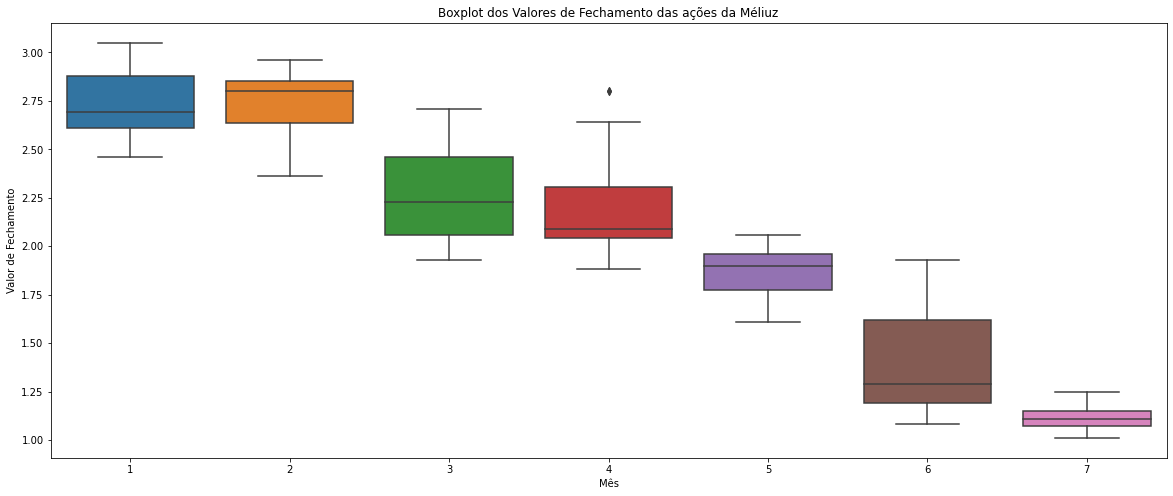

In [12]:
# Boxplot dos valores de fechamento
plt.figure(figsize=(20,8))
sns.boxplot(x='MES', y= 'Adj Close', data=acoesMeliuz)
plt.title("Boxplot dos Valores de Fechamento das ações da Méliuz")
plt.xlabel("Mês")
plt.ylabel("Valor de Fechamento")
plt.show()

In [13]:
# Retorno simples
acoesMeliuz['retorno_simples'] = (acoesMeliuz['Adj Close'] / acoesMeliuz['Adj Close'].shift(1)) - 1 
print(acoesMeliuz['retorno_simples'])

0           NaN
1     -0.052459
2     -0.089965
3     -0.007605
4      0.000000
         ...   
140   -0.009259
141   -0.056075
142    0.039604
143    0.019048
144   -0.018692
Name: retorno_simples, Length: 145, dtype: float64


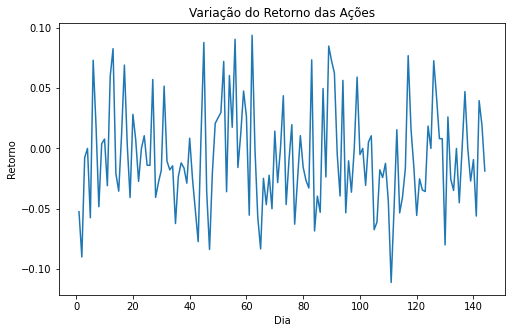

In [14]:
# Gráfico de linha da variação do retorno
acoesMeliuz['retorno_simples'].plot(figsize=(8,5))
plt.title("Variação do Retorno das Ações")
plt.xlabel("Dia")
plt.ylabel("Retorno")
plt.show()

In [15]:
# Retorno médio da ação
retorno_medio = acoesMeliuz['retorno_simples'].mean()
retorno_medio

-0.006472971578167756

In [16]:
# Retorno médio da ação em percentagem
retorno_medio = acoesMeliuz['retorno_simples'].mean()*250
retorno_medio

-1.618242894541939

## **IMC (MEAL3)**

Responsável pelas operações brasileiras do KFC e da Pizza Hut, a International Meal Company (MEAL3) tem restaurantes espalhados pelas Américas, incluindo os Estados Unidos. A empresa, que esteve entre as que mais sofreram com as restrições impostas pela pandemia, vem apresentando recuperação gradual e já supera marcas pré-covid.

<h4><b>Preço 21/01: 2,34 reais | Preço-alvo em 12 meses: 13 reais | Upside: 455,6%</b></h4>

In [17]:
# Extraindo os dados das ações do Yahoo Finance
acoesIMC = yfinance.download(tickers="MEAL3.SA", start="2022-01-01").reset_index(level=0)

[*********************100%***********************]  1 of 1 completed


In [18]:
acoesIMC

Date     Open     High      Low    Close  Adj Close   Volume
0   2022-01-03 2.460000 2.490000 2.340000 2.350000   2.350000  2233300
1   2022-01-04 2.350000 2.380000 2.260000 2.260000   2.260000  1769900
2   2022-01-05 2.260000 2.280000 2.130000 2.130000   2.130000  2640400
3   2022-01-06 2.170000 2.200000 2.090000 2.170000   2.170000  2638200
4   2022-01-07 2.160000 2.240000 2.100000 2.120000   2.120000  2656700
..         ...      ...      ...      ...      ...        ...      ...
140 2022-07-25 1.700000 1.700000 1.630000 1.660000   1.660000  1611400
141 2022-07-26 1.660000 1.660000 1.540000 1.540000   1.540000  3328100
142 2022-07-27 1.550000 1.600000 1.540000 1.580000   1.580000  2145000
143 2022-07-28 1.600000 1.630000 1.560000 1.600000   1.600000  1548200
144 2022-07-29 1.600000 1.650000 1.580000 1.650000   1.650000  1883600

[145 rows x 7 columns]

In [19]:
acoesIMC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       145 non-null    datetime64[ns]
 1   Open       145 non-null    float64       
 2   High       145 non-null    float64       
 3   Low        145 non-null    float64       
 4   Close      145 non-null    float64       
 5   Adj Close  145 non-null    float64       
 6   Volume     145 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.1 KB


In [20]:
acoesIMC.describe()

Open       High        Low      Close  Adj Close         Volume
count 145.000000 145.000000 145.000000 145.000000 145.000000     145.000000
mean    2.286276   2.339379   2.232828   2.279379   2.279379 1837750.344828
std     0.463411   0.472563   0.452525   0.464973   0.464973  741369.733643
min     1.540000   1.570000   1.510000   1.540000   1.540000  559500.000000
25%     1.920000   1.930000   1.870000   1.890000   1.890000 1283200.000000
50%     2.300000   2.380000   2.240000   2.320000   2.320000 1681900.000000
75%     2.640000   2.700000   2.600000   2.650000   2.650000 2250500.000000
max     3.090000   3.180000   3.010000   3.070000   3.070000 4102800.000000

In [21]:
# Gráfico de Linhas
x1 = acoesIMC.Date
y1 = acoesIMC['Close']

data = [go.Scatter(x=x1, y=y1,
    line=dict(color="#A11D21"))]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço de Fechamento'),
    title="<b>Ações IMC (MEAL3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [22]:
# Gráfico Candlestick
dataset2 = acoesIMC[-360:]

dados = go.Candlestick(x=dataset2.Date, 
                       open=dataset2.Open, 
                       high=dataset2.High, 
                       low=dataset2.Low, 
                       close=dataset2.Close
                       )
data=[dados]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço da Ação'),
    title="<b>Ações IMC (MEAL3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grafico_candlestick')

In [23]:
# Separando ano, mês e dia do campo de data
acoesIMC['ANO'] = acoesIMC['Date'].dt.year
acoesIMC['MES'] = acoesIMC['Date'].dt.month
acoesIMC['DIA'] = acoesIMC['Date'].dt.day

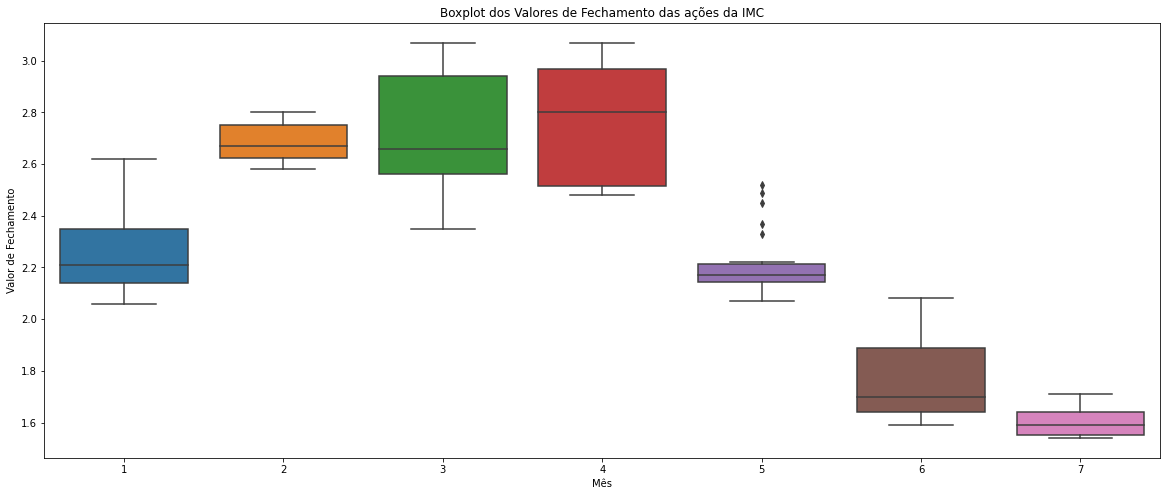

In [24]:
# Boxplot dos valores de fechamento
plt.figure(figsize=(20,8))
sns.boxplot(x='MES', y= 'Adj Close', data=acoesIMC)
plt.title("Boxplot dos Valores de Fechamento das ações da IMC")
plt.xlabel("Mês")
plt.ylabel("Valor de Fechamento")
plt.show()

In [25]:
# Retorno simples
acoesIMC['retorno_simples'] = (acoesIMC['Adj Close'] / acoesIMC['Adj Close'].shift(1)) - 1 
print(acoesIMC['retorno_simples'])

0           NaN
1     -0.038298
2     -0.057522
3      0.018779
4     -0.023042
         ...   
140   -0.023529
141   -0.072289
142    0.025974
143    0.012658
144    0.031250
Name: retorno_simples, Length: 145, dtype: float64


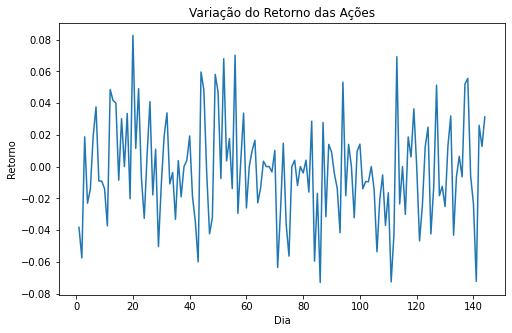

In [26]:
# Gráfico de linha da variação do retorno
acoesIMC['retorno_simples'].plot(figsize=(8,5))
plt.title("Variação do Retorno das Ações")
plt.xlabel("Dia")
plt.ylabel("Retorno")
plt.show()

In [27]:
# Retorno médio da ação
retorno_medio = acoesIMC['retorno_simples'].mean()
retorno_medio

-0.001951766412108106

In [28]:
# Retorno médio da ação em percentagem
retorno_medio = acoesIMC['retorno_simples'].mean()*250
retorno_medio

-0.4879416030270265

## **Enjoei (ENJU3)**

Após quase dobrarem de preço em seus primeiros meses de bolsa, entre o fim de 2020 e o começo de 2021, as ações da Enjoei atravessam um momento adverso já há alguns meses. Os papéis estão mais de 85% abaixo das máximas históricas de fevereiro de 2021.

<h4><b>Preço 21/01: 2,87 reais | Preço-alvo em 12 meses: 7 reais | Upside: 143,9%</b></h4>

In [29]:
# Extraindo os dados das ações do Yahoo Finance
acoesEnjoei = yfinance.download(tickers="ENJU3.SA", start="2022-01-01").reset_index(level=0)

[*********************100%***********************]  1 of 1 completed


In [30]:
acoesEnjoei

Date     Open     High      Low    Close  Adj Close   Volume
0   2022-01-03 2.880000 2.940000 2.680000 2.680000   2.680000  2320100
1   2022-01-04 2.730000 2.750000 2.520000 2.520000   2.520000  1763600
2   2022-01-05 2.550000 2.590000 2.350000 2.350000   2.350000  3056700
3   2022-01-06 2.350000 2.450000 2.300000 2.350000   2.350000  1759100
4   2022-01-07 2.330000 2.540000 2.260000 2.440000   2.440000  3041100
..         ...      ...      ...      ...      ...        ...      ...
140 2022-07-25 1.180000 1.200000 1.130000 1.130000   1.130000  1805100
141 2022-07-26 1.130000 1.150000 1.090000 1.090000   1.090000  1008600
142 2022-07-27 1.100000 1.150000 1.100000 1.140000   1.140000   941800
143 2022-07-28 1.150000 1.190000 1.120000 1.180000   1.180000  1448500
144 2022-07-29 1.180000 1.190000 1.130000 1.150000   1.150000  1095900

[145 rows x 7 columns]

In [31]:
acoesEnjoei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       145 non-null    datetime64[ns]
 1   Open       145 non-null    float64       
 2   High       145 non-null    float64       
 3   Low        145 non-null    float64       
 4   Close      145 non-null    float64       
 5   Adj Close  145 non-null    float64       
 6   Volume     145 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.1 KB


In [32]:
acoesEnjoei.describe()

Open       High        Low      Close  Adj Close         Volume
count 145.000000 145.000000 145.000000 145.000000 145.000000     145.000000
mean    2.195517   2.267655   2.119862   2.182138   2.182138 2661787.586207
std     0.669972   0.695792   0.649950   0.674892   0.674892 1281741.348977
min     1.000000   1.040000   0.970000   1.000000   1.000000  781000.000000
25%     1.740000   1.750000   1.670000   1.690000   1.690000 1771200.000000
50%     2.300000   2.360000   2.250000   2.300000   2.300000 2416400.000000
75%     2.760000   2.870000   2.660000   2.740000   2.740000 3135800.000000
max     3.140000   3.250000   3.080000   3.140000   3.140000 8455600.000000

In [33]:
# Gráfico de Linhas
x1 = acoesEnjoei.Date
y1 = acoesEnjoei['Close']

data = [go.Scatter(x=x1, y=y1,
    line=dict(color="#A11D21"))]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço de Fechamento'),
    title="<b>Ações Enjoei (ENJU3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [34]:
# Gráfico Candlestick
dataset2 = acoesEnjoei[-360:]

dados = go.Candlestick(x=dataset2.Date, 
                       open=dataset2.Open, 
                       high=dataset2.High, 
                       low=dataset2.Low, 
                       close=dataset2.Close
                       )
data=[dados]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço da Ação'),
    title="<b>Ações Enjoei (ENJU3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grafico_candlestick')

In [35]:
# Separando ano, mês e dia do campo de data
acoesEnjoei['ANO'] = acoesEnjoei['Date'].dt.year
acoesEnjoei['MES'] = acoesEnjoei['Date'].dt.month
acoesEnjoei['DIA'] = acoesEnjoei['Date'].dt.day

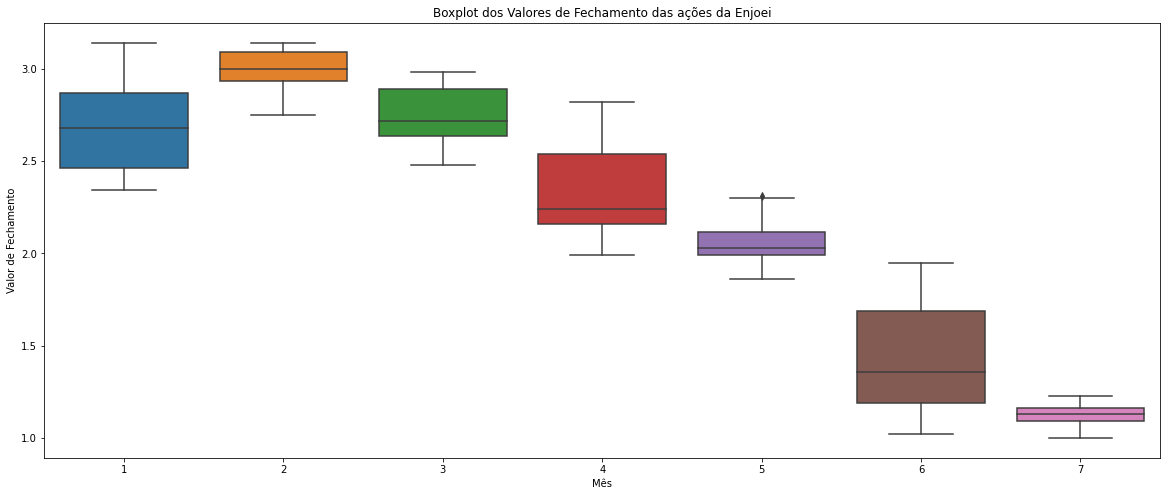

In [36]:
# Boxplot dos valores de fechamento
plt.figure(figsize=(20,8))
sns.boxplot(x='MES', y= 'Adj Close', data=acoesEnjoei)
plt.title("Boxplot dos Valores de Fechamento das ações da Enjoei")
plt.xlabel("Mês")
plt.ylabel("Valor de Fechamento")
plt.show()

In [37]:
# Retorno simples
acoesEnjoei['retorno_simples'] = (acoesEnjoei['Adj Close'] / acoesEnjoei['Adj Close'].shift(1)) - 1 
print(acoesEnjoei['retorno_simples'])

0           NaN
1     -0.059702
2     -0.067460
3      0.000000
4      0.038298
         ...   
140   -0.042373
141   -0.035398
142    0.045872
143    0.035088
144   -0.025424
Name: retorno_simples, Length: 145, dtype: float64


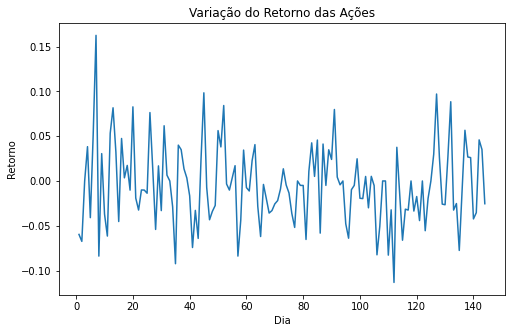

In [38]:
# Gráfico de linha da variação do retorno
acoesEnjoei['retorno_simples'].plot(figsize=(8,5))
plt.title("Variação do Retorno das Ações")
plt.xlabel("Dia")
plt.ylabel("Retorno")
plt.show()

In [39]:
# Retorno médio da ação
retorno_medio = acoesEnjoei['retorno_simples'].mean()
retorno_medio

-0.004894842149057754

In [40]:
# Retorno médio da ação em percentagem
retorno_medio = acoesEnjoei['retorno_simples'].mean()*250
retorno_medio

-1.2237105372644386

## **Oi (OIBR3)**

A Oi é uma das ações mais presentes na carteira dos brasileiros, com mais de 1,5 milhão de investidores em sua base de acionistas. E essa aposta tem sentido, na visão de analistas do BTG Pactual, que esperam pela contínua expansão de sua rede de fibra ótica da Oi. Trata-se do novo core business da telecom depois da venda da unidade de telefonia móvel.

<h4><b>Preço 21/01: 0,86 real | Preço-alvo em 12 meses: 2,30 reais | Upside: 167,4%</b></h4>

In [41]:
# Extraindo os dados das ações do Yahoo Finance
acoesOi = yfinance.download(tickers="OIBR3.SA", start="2022-01-01").reset_index(level=0)

[*********************100%***********************]  1 of 1 completed


In [42]:
acoesOi

Date     Open     High      Low    Close  Adj Close    Volume
0   2022-01-03 0.760000 0.790000 0.740000 0.750000   0.750000  47428700
1   2022-01-04 0.750000 0.760000 0.720000 0.720000   0.720000  43323600
2   2022-01-05 0.720000 0.740000 0.700000 0.710000   0.710000  74603800
3   2022-01-06 0.710000 0.710000 0.680000 0.710000   0.710000  57692100
4   2022-01-07 0.700000 0.740000 0.690000 0.710000   0.710000  65951700
..         ...      ...      ...      ...      ...        ...       ...
140 2022-07-25 0.500000 0.510000 0.500000 0.500000   0.500000  35735700
141 2022-07-26 0.490000 0.500000 0.480000 0.490000   0.490000  29548600
142 2022-07-27 0.490000 0.500000 0.480000 0.490000   0.490000  46647200
143 2022-07-28 0.490000 0.490000 0.470000 0.480000   0.480000  35221400
144 2022-07-29 0.480000 0.490000 0.460000 0.470000   0.470000  61889700

[145 rows x 7 columns]

In [43]:
acoesOi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       145 non-null    datetime64[ns]
 1   Open       145 non-null    float64       
 2   High       145 non-null    float64       
 3   Low        145 non-null    float64       
 4   Close      145 non-null    float64       
 5   Adj Close  145 non-null    float64       
 6   Volume     145 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 8.1 KB


In [44]:
acoesOi.describe()

Open       High        Low      Close  Adj Close           Volume
count 145.000000 145.000000 145.000000 145.000000 145.000000       145.000000
mean    0.737448   0.760414   0.713241   0.735310   0.735310  78657425.517241
std     0.156542   0.164780   0.147981   0.156418   0.156418  73910528.072446
min     0.480000   0.490000   0.460000   0.470000   0.470000  25901000.000000
25%     0.610000   0.620000   0.600000   0.610000   0.610000  44731600.000000
50%     0.760000   0.790000   0.740000   0.760000   0.760000  59685900.000000
75%     0.830000   0.860000   0.810000   0.840000   0.840000  88310500.000000
max     1.080000   1.160000   1.050000   1.070000   1.070000 733320000.000000

In [45]:
# Gráfico de Linhas
x1 = acoesOi.Date
y1 = acoesOi['Close']

data = [go.Scatter(x=x1, y=y1,
    line=dict(color="#A11D21"))]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço de Fechamento'),
    title="<b>Ações Oi (OIBR3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [46]:
# Gráfico Candlestick
dataset2 = acoesOi[-360:]

dados = go.Candlestick(x=dataset2.Date, 
                       open=dataset2.Open, 
                       high=dataset2.High, 
                       low=dataset2.Low, 
                       close=dataset2.Close
                       )
data=[dados]

layout = go.Layout(
    xaxis=dict(range=['2022-01-01', dataHoje], title='Data'), 
    yaxis=dict(range=[min(x1), max(y1)], title='Preço da Ação'),
    title="<b>Ações Oi (OIBR3) em 2022</b>"
    )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grafico_candlestick')

In [47]:
# Separando ano, mês e dia do campo de data
acoesOi['ANO'] = acoesOi['Date'].dt.year
acoesOi['MES'] = acoesOi['Date'].dt.month
acoesOi['DIA'] = acoesOi['Date'].dt.day

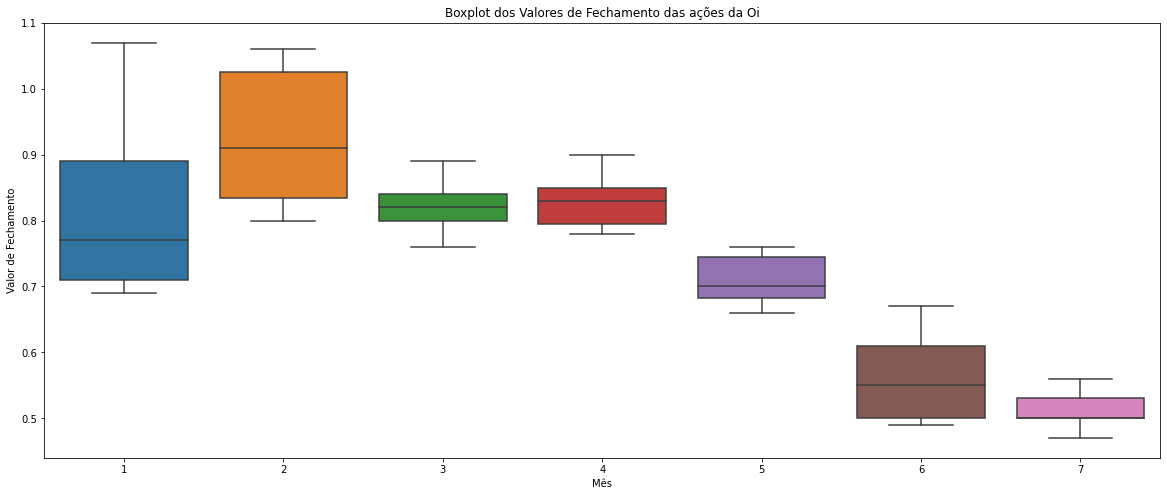

In [48]:
# Boxplot dos valores de fechamento
plt.figure(figsize=(20,8))
sns.boxplot(x='MES', y= 'Adj Close', data=acoesOi)
plt.title("Boxplot dos Valores de Fechamento das ações da Oi")
plt.xlabel("Mês")
plt.ylabel("Valor de Fechamento")
plt.show()

In [49]:
# Retorno simples
acoesOi['retorno_simples'] = (acoesOi['Adj Close'] / acoesOi['Adj Close'].shift(1)) - 1 
print(acoesOi['retorno_simples'])

0           NaN
1     -0.040000
2     -0.013889
3      0.000000
4      0.000000
         ...   
140   -0.019608
141   -0.020000
142    0.000000
143   -0.020408
144   -0.020833
Name: retorno_simples, Length: 145, dtype: float64


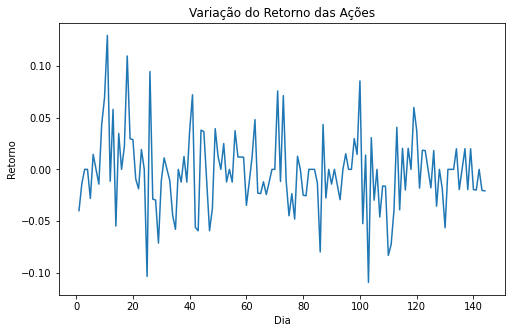

In [50]:
# Gráfico de linha da variação do retorno
acoesOi['retorno_simples'].plot(figsize=(8,5))
plt.title("Variação do Retorno das Ações")
plt.xlabel("Dia")
plt.ylabel("Retorno")
plt.show()

In [51]:
# Retorno médio da ação
retorno_medio = acoesOi['retorno_simples'].mean()
retorno_medio

-0.002540751733901377

In [52]:
# Retorno médio da ação em percentagem
retorno_medio = acoesOi['retorno_simples'].mean()*250
retorno_medio

-0.6351879334753443

## **Carteira de Ações**



1.   Méliuz (CASH3)
2.   IMC (MEAL3)
3.   Enjoei (ENJU3)
4.   Oi (OIBR3)



In [53]:
carteira  = ['CASH3.SA', 'MEAL3.SA', 'ENJU3.SA',  'OIBR3.SA']

In [54]:
ind_data = pd.DataFrame()

for t in carteira:
  ind_data[t] = yfinance.download(t, start="2022-01-01")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
ind_data.head()

CASH3.SA  MEAL3.SA  ENJU3.SA  OIBR3.SA
Date                                              
2022-01-03  3.050000  2.350000  2.680000  0.750000
2022-01-04  2.890000  2.260000  2.520000  0.720000
2022-01-05  2.630000  2.130000  2.350000  0.710000
2022-01-06  2.610000  2.170000  2.350000  0.710000
2022-01-07  2.610000  2.120000  2.440000  0.710000

In [56]:
ind_data.iloc[0]

CASH3.SA   3.050000
MEAL3.SA   2.350000
ENJU3.SA   2.680000
OIBR3.SA   0.750000
Name: 2022-01-03 00:00:00, dtype: float64

In [57]:
ind_data.mean()

CASH3.SA   2.033655
MEAL3.SA   2.279379
ENJU3.SA   2.182138
OIBR3.SA   0.735310
dtype: float64

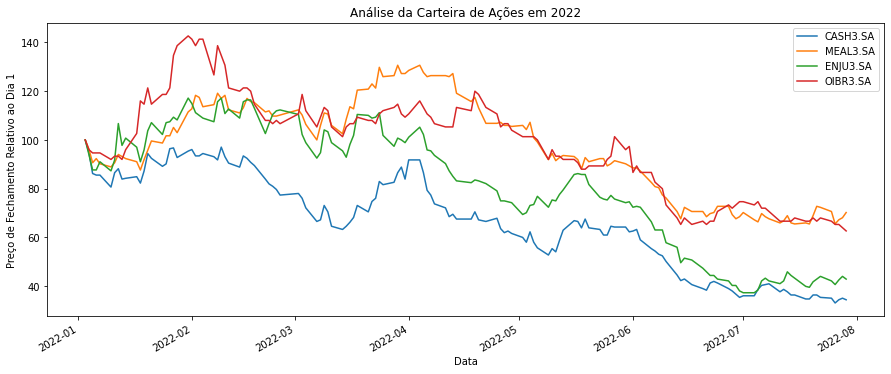

In [58]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))
plt.title("Análise da Carteira de Ações em 2022")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento Relativo ao Dia 1")
plt.show()

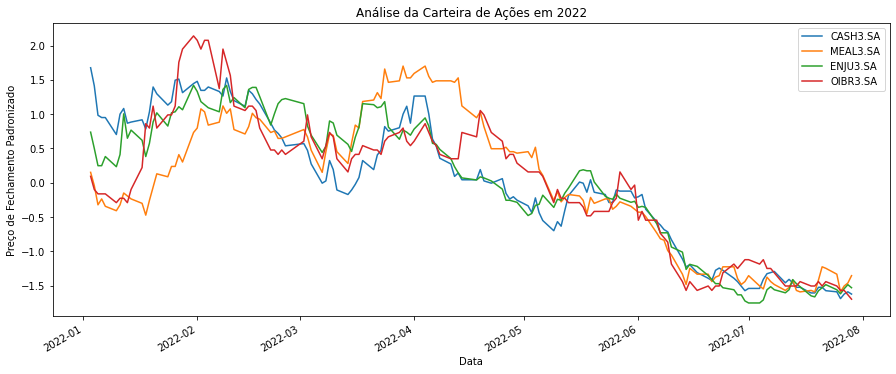

In [59]:
((ind_data - ind_data.mean()) / ind_data.std()).plot(figsize=(15,6))
plt.title("Análise da Carteira de Ações em 2022")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento Padronizado")
plt.show()

In [60]:
retorno_port = (ind_data / ind_data.shift(1)) - 1
retorno_port.tail()

CASH3.SA  MEAL3.SA  ENJU3.SA  OIBR3.SA
Date                                              
2022-07-25 -0.009259 -0.023529 -0.042373 -0.019608
2022-07-26 -0.056075 -0.072289 -0.035398 -0.020000
2022-07-27  0.039604  0.025974  0.045872  0.000000
2022-07-28  0.019048  0.012658  0.035088 -0.020408
2022-07-29 -0.018692  0.031250 -0.025424 -0.020833

In [61]:
retorno_port_medio = retorno_port.mean() * 250
retorno_port_medio

CASH3.SA   -1.618243
MEAL3.SA   -0.487942
ENJU3.SA   -1.223711
OIBR3.SA   -0.635188
dtype: float64

In [62]:
pesos = np.array([0.25, 0.25,0.25, 0.25])
np.dot(retorno_port_medio, pesos)

-0.9912707420771871

In [63]:
pesos2 = np.array([0.1, 0.5, 0.1, 0.3])
np.dot(retorno_port_medio, pesos2)

-0.7187225247367544

In [64]:
np.dot(retorno_port_medio, np.array([0.1, 0.55, 0.1, 0.25]))

-0.7113602082143384

## **Conclusão**

Mesmo negociadas com preço baixo, a carteira é péssima! E dependendo da quantidade negociada, o prejuízo pode ser desastroso. **Fuja**!